## 一、逻辑回归的正则化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('ex2data2.txt', names = ['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


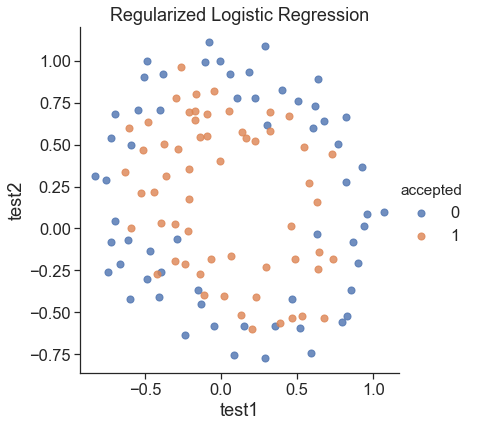

In [3]:
sns.set(context = "notebook", style = "ticks", font_scale = 1.5)

sns.lmplot('test1', 'test2', hue = 'accepted', data = df, 
           size = 6, 
           fit_reg = False, 
           scatter_kws = {"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

## 1.1 手动增加特征

In [8]:
# 故意把特征变多，用于产生过拟合效果
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        #return pd.DataFrame(data).as_matrix()
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [9]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [10]:
# 增加元素数据集的特征数
data = feature_mapping(x1, x2, power = 6)

print(data.shape)

data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [11]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


## 1.2 正则化代价函数

In [32]:
# 读取数据值，即数据标签
def get_y(df):
    # 返回原始数据最后一列组成的数组，df.iloc[:, -1] 指最后一列
    return np.array(df.iloc[:, -1])

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [34]:
# 梯度计算
# return 梯度的一维数组
def gradient(theta, X, y):
    # 向量化计算公式：(1 / m) * X.T @ (sigmoid(X @ theta) - y)
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [35]:
# 逻辑回归代价函数
def cost_function(theta, X, y):
    # X @ theta? h(x) = sigmoid(theta^T * X)
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [36]:
# j = 28，28 个参数 theta
theta = np.zeros(data.shape[1])

In [37]:
X = feature_mapping(x1, x2, power = 6, as_ndarray = True)
print(X.shape)

y = get_y(df)
print(y.shape)

(118, 28)
(118,)


In [38]:
# 正则化代价函数
# lambda 设置为 1
def regularized_cost(theta, X, y, lamd = 1):
    theta_one2n = theta[1:]
    regularized_term = (lamd / (2 * len(X))) * np.power(theta_one2n, 2).sum()
    return cost_function(theta, X, y) + regularized_term

In [39]:
# 因为 theta 均为 0，所以相当于没有进行正则化，输出与代价函数值相同
regularized_cost(theta, X, y, lamd = 1)

0.6931471805599454

## 1.3 正则化梯度

In [43]:
# 添加正则化项的逻辑回归梯度下降
def regularized_gradient(theta, X, y, lamd = 1):
    theta_one2n = theta[1:]
    regularized_theta = (lamd / len(X)) * theta_one2n
    
    # 不对 theta_0 正则化？？？
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    
    # 一次返回 28 个正则化后的梯度参数
    return gradient(theta, X, y) + regularized_term 

In [44]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## 1.4 拟合参数

In [45]:
import scipy.optimize as opt

In [46]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))

init cost = 0.6931471805599454


In [47]:
res = opt.minimize(fun = regularized_cost, x0 = theta, args = (X, y), method = 'Newton-CG', jac = regularized_gradient)
res

     fun: 0.5290027297127542
     jac: array([-4.71952568e-08, -1.14457746e-08,  2.45828726e-08, -3.37674508e-08,
        1.50839836e-08, -6.26344651e-08,  1.47936000e-08,  1.44056576e-08,
        9.25470477e-09, -2.89079664e-08, -4.15440254e-08, -5.39192035e-09,
       -4.31597056e-08,  7.74514234e-09, -7.33884638e-08,  2.48858272e-09,
        1.14058975e-08, -1.27449854e-08, -8.06033750e-09,  1.32958062e-08,
       -4.66425956e-08, -3.00496891e-08,  6.99938544e-10, -1.90907362e-08,
       -5.59017882e-09, -1.83826946e-08,  2.74986858e-09, -7.07341836e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.27273914,  0.62527176,  1.18108862, -2.01996089, -0.91742465,
       -1.43166351,  0.12400766, -0.36553408, -0.35723919, -0.17512987,
       -1.4581576 , -0.05099003, -0.61555683, -0.27470695, -1.19281634,
       -0.24218765, -0.20600567, -0.04473145, -0.27778483, -0.29537771,
       -0.4

## 1.6 训练集预测

In [48]:
# 验证函数
# X: 待验证的特征矩阵
# theta: 已经训练好的逻辑回归参数
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [49]:
final_theta = res.x

y_predict = predict(X, final_theta)

print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



## 1.7 使用不同的 $\lambda$

In [50]:
# 特征映射的逻辑回归
def feature_mapped_logistic_regression(power, lamd):
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    
    X = feature_mapping(x1, x2, power, as_ndarray = True)
    y = get_y(df)
    
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun = regularized_cost, x0 = theta, args = (X, y, lamd), method = 'TNC', jac = regularized_gradient)
    
    final_theta = res.x
    
    return final_theta

In [51]:
# 寻找决策边界 - 暂时没明白
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe
    
    #inner_product = mapped_cord.as_matrix() @ theta
    inner_product = mapped_cord.values @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01

In [54]:
def draw_boundary(power, lamd):
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, lamd)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [58]:
# 不使用正则化技术，导致过拟合 over-fitting
#draw_boundary(power = 6, lamd = 0)

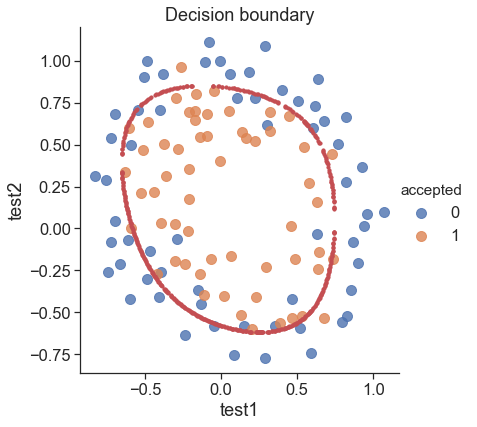

In [67]:
# 使用合适的 lambda = 1，解决过拟合问题
draw_boundary(power = 6, lamd = 1)

In [68]:
# 使用太大的 lambda = 100，导致欠拟合 under-fitting
#draw_boundary(power = 6, lamd = 100)